In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob as gb
import cv2
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score
from scipy.spatial import distance
import random
import os

In [3]:
training_data = 'C:\\Users\\ajit7\\OneDrive\\Documents\\Major Project\\Face Mask Dataset\\Train'
validation_data = 'C:\\Users\\ajit7\\OneDrive\\Documents\\Major Project\\Face Mask Dataset\\Validation'
test_data = 'C:\\Users\\ajit7\\OneDrive\\Documents\\Major Project\\Face Mask Dataset\\Test'

In [4]:
import os
import glob
training_data = 'C:\\Users\\ajit7\\OneDrive\\Documents\\Major Project\\Face Mask Dataset\\Train'
for folder in os.listdir(training_data):
    folder_path = os.path.join(training_data, folder)
    files = glob.glob(os.path.join((training_data + '/'  + folder + '/*.png')))
    print(f"For data in {folder}, found {len(files)}.png files")




For data in WithMask, found 5000.png files
For data in WithoutMask, found 5000.png files


In [5]:
code = {'WithoutMask':0, 'WithMask':1}
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x

In [6]:
img_width =224
img_height =224

In [7]:
data_train = tf.keras.utils.image_dataset_from_directory(
    training_data,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 10000 files belonging to 2 classes.


In [8]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

size = []
for folder in os.listdir(training_data):
    files = glob.glob(pathname=str(training_data + '/'  + folder + '/*.png'))
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(224, 224, 3)    4253
(107, 107, 3)     234
(106, 106, 3)     228
(105, 105, 3)     225
(102, 102, 3)     220
                 ... 
(158, 158, 3)       1
(173, 173, 3)       1
(151, 151, 3)       1
(284, 284, 3)       1
(156, 156, 3)       1
Name: count, Length: 139, dtype: int64

In [9]:
import cv2
import numpy as np
import os
import glob

s = 224
X_train = []
y_train = []

training_data = 'C:\\Users\\ajit7\\OneDrive\\Documents\\Major Project\\Face Mask Dataset\\Train' 
code = {'WithoutMask':0, 'WithMask':1} 

for folder in os.listdir(training_data):
    files = glob.glob(pathname=str(training_data + '/' + folder + '/*.png'))
    for file in files:
        image = cv2.imread(file)
        info = np.iinfo(image.dtype)
        image = image.astype(np.float64) / info.max
        image = 255 * image
        image = image.astype(np.uint8)
        image_array = cv2.resize(image, (s, s))
        image_array = image_array.astype(np.uint8)
        X_train.append(list(image_array))
        y_train.append(code[folder])

In [10]:
print(f'We have {len(X_train)} items in X_train')
print(f'We have {len(y_train)} items in Y_train')

We have 10000 items in X_train
We have 10000 items in Y_train


In [11]:

import cv2
import numpy as np
import os
import glob

s = 224
X_val = []
y_val = []

validation_data = 'C:\\Users\\ajit7\\OneDrive\\Documents\\Major Project\\Face Mask Dataset\\Validation' 
code = {'WithoutMask':0, 'WithMask':1} 

for folder in os.listdir(validation_data):
    files = glob.glob(pathname=str(validation_data + '/' + folder + '/*.png'))
    for file in files:
        image = cv2.imread(file)
        info = np.iinfo(image.dtype)
        image = image.astype(np.float64) / info.max
        image = 255 * image
        image = image.astype(np.uint8)
        image_array = cv2.resize(image, (s, s))
        image_array = image_array.astype(np.uint8)
        X_val.append(list(image_array))
        y_val.append(code[folder])

In [12]:
print(f'We have {len(X_val)} items in X_val')
print(f'We have {len(y_val)} items in y_val')

We have 800 items in X_val
We have 800 items in y_val


In [13]:
import cv2
import numpy as np
import os
import glob

s = 224
X_test = []
y_test = []

test_data = 'C:\\Users\\ajit7\\OneDrive\\Documents\\Major Project\\Face Mask Dataset\\Test' 
code = {'WithoutMask':0, 'WithMask':1} 

for folder in os.listdir(test_data):
    files = glob.glob(pathname=str(test_data + '/' + folder + '/*.png'))
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image, (s, s))
        X_test.append(list(image_array))
        y_test.append(code[folder])

In [14]:
print(f'we have {len(X_test)} items in X_test')
print(f'we have {len(y_test)} items in y_test')

we have 992 items in X_test
we have 992 items in y_test


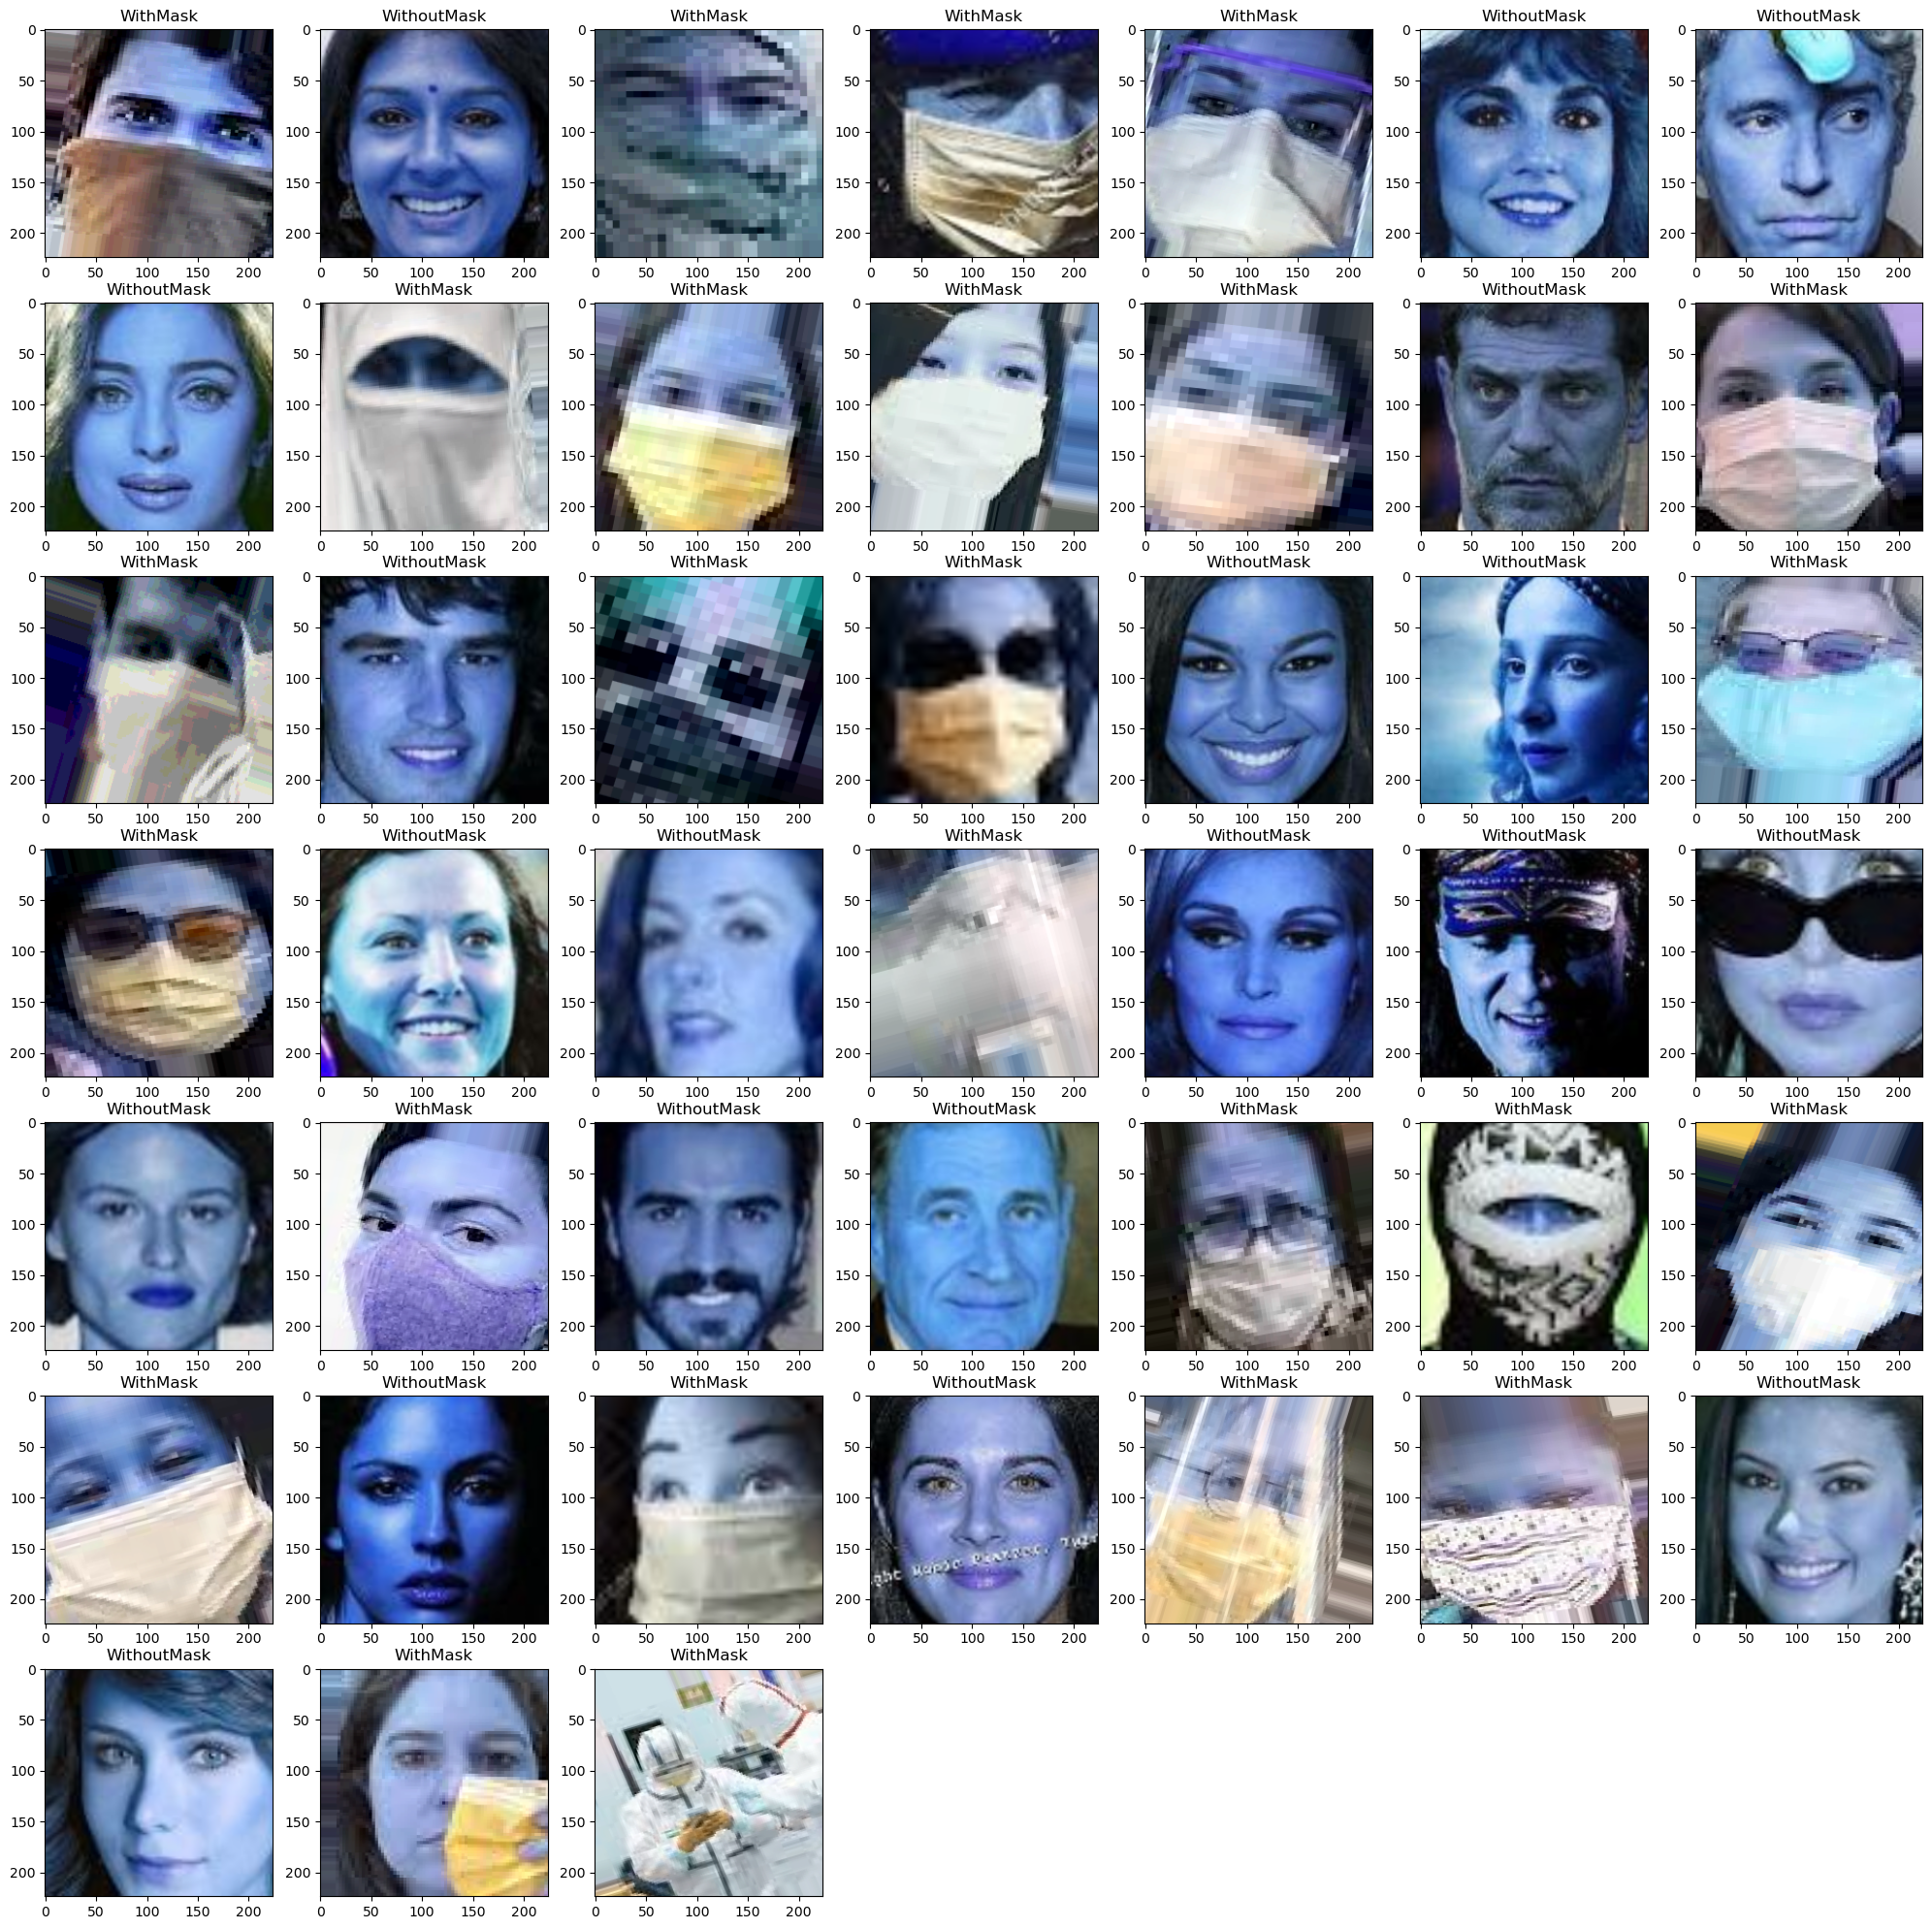

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(25,25))
for n, i in enumerate(list(np.random.randint(0, len(X_train), 45))):
    plt.subplot(7, 7, n+1)
    plt.imshow(X_train[i])
    plt.axis('on')
    plt.title(getcode(y_train[i]))
plt.show()


In [16]:
import numpy as np
import random

#Training data
temp1 = list(zip(X_train, y_train))
random.shuffle(temp1)
X_train, y_train = zip(*temp1)
X_train, y_train = list(X_train), list(y_train)

X_train = np.array(X_train).astype(np.uint8)
y_train = np.array(y_train).astype(np.uint8)


#Validation data
temp2 = list(zip(X_val, y_val))
random.shuffle(temp2)
X_val, y_val = zip(*temp2)
X_val, y_val = list(X_val), list(y_val)

X_val = np.array(X_val).astype(np.uint8)
y_val = np.array(y_val).astype(np.uint8)



#Test data
temp3 = list(zip(X_test, y_test))
random.shuffle(temp3)
X_test, y_test = zip(*temp3)
X_test, y_test = list(X_test), list(y_test)

X_test = np.array(X_test).astype(np.uint8)
y_test = np.array(y_test).astype(np.uint8)

In [17]:
del temp1
del temp2
del temp3

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Define the model
model = Sequential()
model.add(Conv2D(64, kernel_size=(4,4), activation='relu', input_shape=(s,s,3)))
model.add(Conv2D(64, kernel_size=(4,4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(5,5), activation='relu'))
model.add(Conv2D(64, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(5,5), activation='relu'))
model.add(Conv2D(128, kernel_size=(5,5), activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 221, 221, 64)      3136      
                                                                 
 conv2d_1 (Conv2D)           (None, 218, 218, 64)      65600     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 107, 107, 32)      18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 105, 105, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 52, 52, 32)       0         
 2D)                                                    

In [19]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


In [20]:
epochs = 3
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_val, y_val), verbose=1)

Epoch 1/3
157/157 [==============================] - 2396s 15s/step - loss: 0.1477 - accuracy: 0.9435 - val_loss: 0.0958 - val_accuracy: 0.9625
Epoch 2/3
157/157 [==============================] - 2308s 15s/step - loss: 0.0460 - accuracy: 0.9847 - val_loss: 0.0245 - val_accuracy: 0.9937
Epoch 3/3
157/157 [==============================] - 2265s 14s/step - loss: 0.0352 - accuracy: 0.9884 - val_loss: 0.0497 - val_accuracy: 0.9787


In [21]:
ModelLoss, ModelAccuracy = model.evaluate(X_test, y_test,batch_size=64);
print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

16/16 [==============================] - 49s 3s/step - loss: 0.0678 - accuracy: 0.9768
Test Loss is 0.06784256547689438
Test Accuracy is 0.9768145084381104


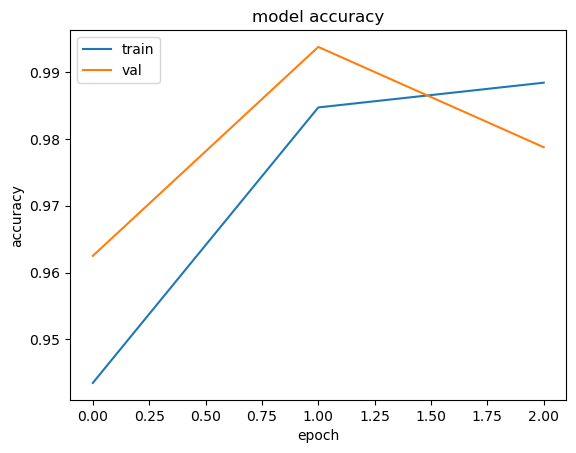

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

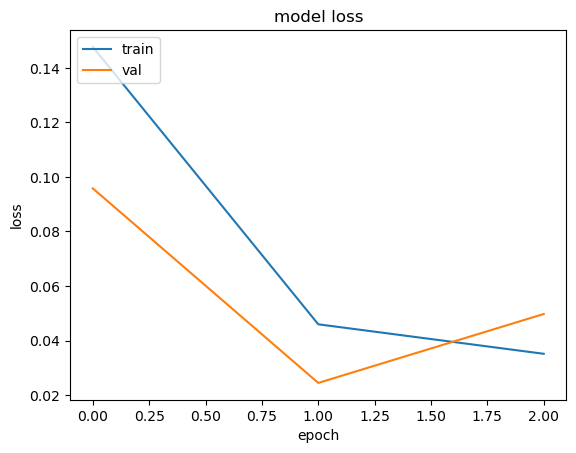

In [23]:
# summarize model for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [24]:
y_pred = model.predict(X_test)
pred = [1 * (x[0]>=0.5) for x in y_pred]

31/31 [==============================] - 55s 2s/step


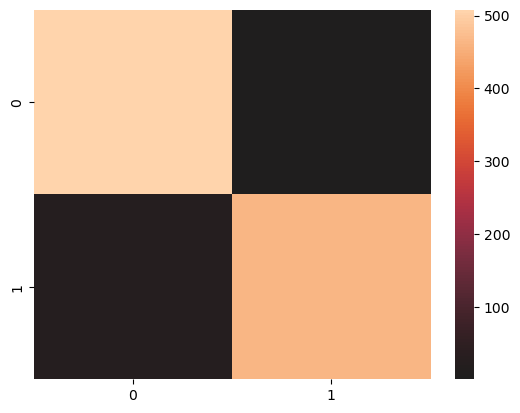

Confusion Matrix is
 [[508   1]
 [ 22 461]]


In [25]:
CM = confusion_matrix(y_test, pred)
sns.heatmap(CM, center=False)
plt.show()
print('Confusion Matrix is\n', CM)

In [26]:
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       509
           1       1.00      0.95      0.98       483

    accuracy                           0.98       992
   macro avg       0.98      0.98      0.98       992
weighted avg       0.98      0.98      0.98       992

0.9768145161290323


In [27]:
image = 'C:\\Users\\ajit7\\OneDrive\\Documents\\Major Project\\Face Mask Dataset\\Test\\WithoutMask\\47.png'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.preprocessing.image.img_to_array(image)
img_bat = tf.expand_dims(img_arr, axis=0)

In [28]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 438ms/step


In [29]:
score = tf.nn.softmax(predict)

In [30]:
data_cat = ['WithMask', 'WithoutMask']
print(' {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

 WithMask with accuracy of 100.00


In [31]:
model.save('Image_classify.keras')